# Handwritten Digits Recognition

## Introduction
The MNIST dataset consists of 70,000 grayscale images of handwritten digits from 0 to 9. Each image is a 28x28 pixel square, resulting in a total of 784 features per instance. This report aims to explore the dataset, preprocess the data, and build predictive models to classify the digits accurately.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Data Overview
Dataset Description
The MNIST dataset is divided into a training set of 60,000 images and a test set of 10,000 images. Each image is accompanied by a corresponding label indicating the digit it represents. The data is well-structured and requires preprocessing to normalize pixel values.



In [ ]:
print('x_train Shape: ', x_train.shape)
print('x_test Shape: ', x_test.shape)
print('y_train Shape: ', y_train.shape)
print('y_test Shape: ', y_test.shape)

x_train Shape:  (60000, 28, 28)
x_test Shape:  (10000, 28, 28)
y_train Shape:  (60000,)
y_test Shape:  (10000,)


In [ ]:
class_counts = np.bincount(y_train)
class_labels = np.arange(len(class_counts))
print(f'Label: {class_labels} , class: {class_counts}')

Label: [0 1 2 3 4 5 6 7 8 9] , class: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


##  Exploratory Data Analysis (EDA)

Visualizations of sample images from the dataset:

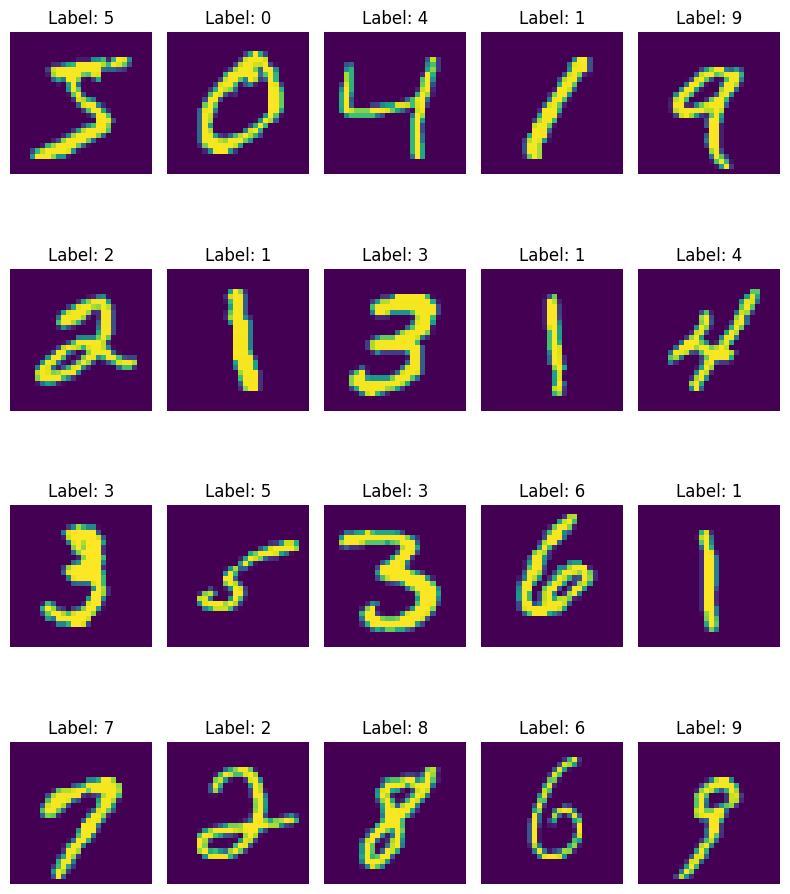

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Distribution of Classes

The classes are relatively balanced, with each digit being represented roughly equally in the dataset.

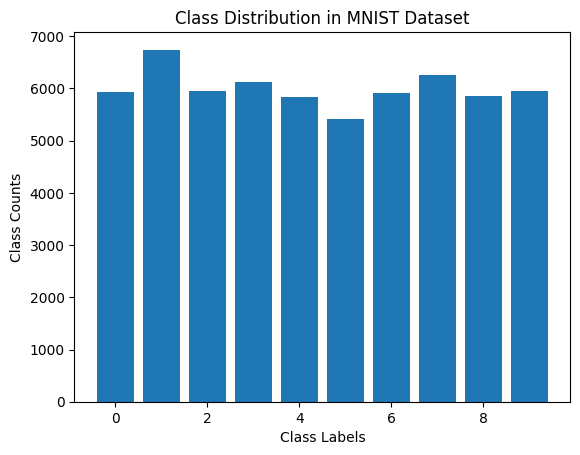

In [ ]:
plt.bar(class_labels, class_counts)
plt.xlabel('Class Labels')
plt.ylabel('Class Counts')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

## Data Preprocessing

### Rescale
Normalization of pixel values to the range [0, 1].

In [ ]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# One hot encoding of Features

from tensorflow import keras
from keras.utils import np_utils
num_classes=len(np.unique(y_train))
y_train= keras.utils.to_categorical(y_train,num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Train, Test and Validate

In [ ]:
# Splitting the data for Validation and Testing

(x_train,x_valid)=x_train[:55000],x_train[55000:]
(y_train,y_valid)=y_train[:55000],y_train[55000:]

In [ ]:
print(x_train.shape[0], 'Train samples')
print(x_test.shape[0], 'Test samples')
print(x_valid.shape[0], 'Validation samples')

55000 Train samples
10000 Test samples
5000 Validation samples


## Model Building

In [ ]:
# Model building using CNN

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

### Compile the Model

In [ ]:
# Compileing of Model

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## Model training

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True)
abc= model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_valid,y_valid),callbacks=[checkpointer],verbose=1,shuffle=True)

Epoch 1/5
1719/1719 [==============================] - 127s 73ms/step - loss: 0.1480 - accuracy: 0.9524 - val_loss: 0.0430 - val_accuracy: 0.9892
Epoch 2/5
1719/1719 [==============================] - 126s 74ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0356 - val_accuracy: 0.9904
Epoch 3/5
1719/1719 [==============================] - 122s 71ms/step - loss: 0.0383 - accuracy: 0.9886 - val_loss: 0.0268 - val_accuracy: 0.9924
Epoch 4/5
1719/1719 [==============================] - 122s 71ms/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.0415 - val_accuracy: 0.9898
Epoch 5/5
1719/1719 [==============================] - 125s 73ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0288 - val_accuracy: 0.9938


### Model with best validation accuracy

In [ ]:
# Saving the best model from the test batch

model.load_weights('best_model.hdf5')

## Model Prediction

In [ ]:
y_hat=model.predict(x_test)

313/313 [==============================] - 7s 21ms/step


In [ ]:
score= model.evaluate(x_test,y_test)
accuracy=score[1]*100

print('Test Accuracy: %.2f%%'  % accuracy)

313/313 [==============================] - 7s 22ms/step - loss: 0.0228 - accuracy: 0.9924
Test Accuracy: 99.24%


## Result

In [ ]:
# Trained model making prediction

import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/best_model.hdf5')
img= image.load_img('/content/6cnn.jpeg',target_size=(28,28,),color_mode='grayscale')
img_array= image.img_to_array(img)/255.0
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)

predicted_class = tf.argmax(predictions[0]).numpy()
print("Predicted Label:", predicted_class)

1/1 [==============================] - 0s 84ms/step
Predicted Label: 6


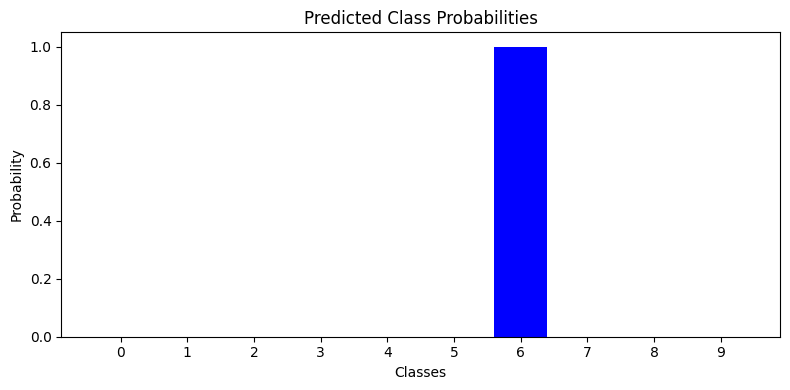

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(predictions[0])), predictions[0], tick_label=class_labels, color='blue')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Predicted Class Probabilities')
plt.tight_layout()


## Applying Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the images into 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9705


# Conclusion
In conclusion, the MNIST dataset has been explored, preprocessed, and used to train and evaluate with CNN and Random forest machine learning models for digit classification.

The results indicate that CNN achieves the highest accuracy and remains the best model for Handwritten digit classification.

